In [1]:
import jax.numpy as jnp
import numpy as onp
from jax.config import config
config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt

from lbg_forecast.modified_redshift import histogram_nz
from lbg_forecast.angular_power import cl_hat
from lbg_forecast.angular_power import define_cosmo

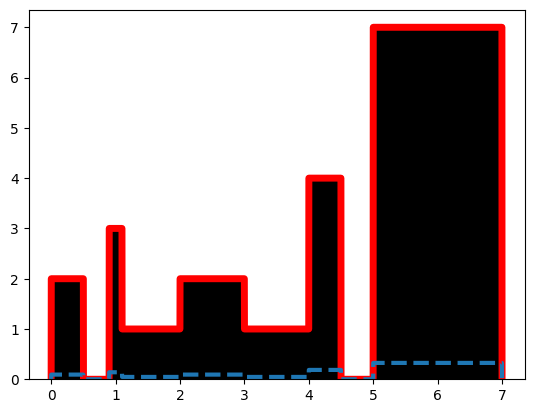

In [2]:
data = onp.array([0.2, 0.2, 1., 1., 1., 1.5, 2., 2., 3., 
                  4., 4., 4., 4., 5., 5., 5., 5., 6., 6., 7.])
bin_edges = onp.array([0., 0.5, 0.9, 1.1, 2., 3., 4., 4.5, 5., 7.])
hist, bins = onp.histogram(data, bin_edges)

#plot numpy histogram (black shaded area)
plt.hist(data, bin_edges, color="k")
area_under_curve_numpy = onp.sum(hist*onp.diff(bin_edges))

#plot jax redshift histogram (red solid line)
nz_hist = histogram_nz(hist, bin_edges)
dz = 1e-3
z_space = jnp.arange(0.0-dz, 7.0+dz, dz)
func = nz_hist.pz_fn(z_space)
plt.plot(z_space, func, color="r", lw="5")
area_under_curve_jax_redshift = onp.trapz(func, z_space)

#test against numpy
onp.testing.assert_allclose(area_under_curve_numpy, 
                            area_under_curve_jax_redshift,
                              rtol=1e-10)

#check normalisation correct
normalised_nz = nz_hist(z_space)
onp.testing.assert_allclose(1.0, onp.trapz(normalised_nz, z_space), rtol=1e-10)

plt.plot(z_space, nz_hist(z_space), lw=3, ls="dashed")

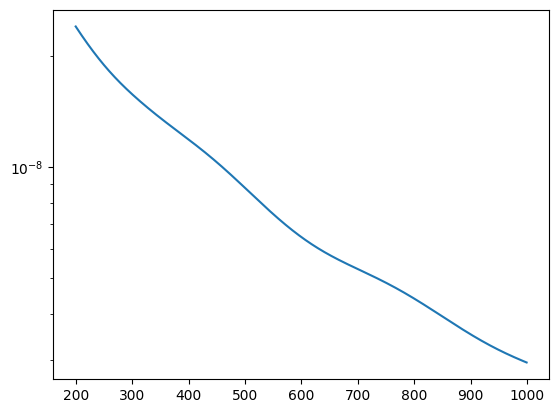

In [3]:
ell = jnp.arange(200, 1000, 1)
cl = cl_hat(define_cosmo(), hist, bin_edges, ell)
plt.plot(ell, cl)
plt.yscale("log")

In [4]:
from jax_cosmo.utils import a2z
from jax_cosmo.utils import z2a

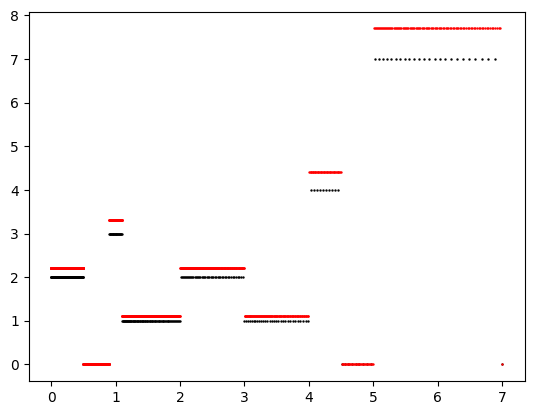

In [5]:
a_space = onp.linspace(z2a(7), 1, 512)
a_space2 = onp.linspace(z2a(7), 1, 2048)
plt.scatter(a2z(a_space), nz_hist.pz_fn(a2z(a_space)), s=0.5, color="k")
plt.scatter(a2z(a_space2), nz_hist.pz_fn(a2z(a_space2))*1.1, s=0.5, color="r")